# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Daniel Zoch

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [2]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)


KeyboardInterrupt



In [3]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [4]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [5]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: suck
step 2 - action: west
step 3 - action: east
step 4 - action: north
step 5 - action: south
step 6 - action: east
step 7 - action: west
step 8 - action: east
step 9 - action: suck
step 10 - action: south
step 11 - action: west
step 12 - action: suck
step 13 - action: north
step 14 - action: west
step 15 - action: west
step 16 - action: east
step 17 - action: east
step 18 - action: north
step 19 - action: west


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [6]:
# Your code and description goes here``
import numpy as np

def simulation_environment(agent, n = 5, p = .2, maxsteps = 10000, verb = True):

    #initialize room
    room = np.random.choice(a=[True, False], size=(n, n), p=[p, 1-p])
    to_clean = np.sum(room)
    if verb: 
        print(f"room with {to_clean} dirty squares:\n{room}")

    # initialize position to be a random position somewhere in the room
    x = np.random.randint(n)
    y = np.random.randint(n)
    pos = [x , y]
    
    if verb: 
        print("\nstart simulation")
    for step in range(1, maxsteps+1):
       
        # prepare percepts
        bumpers = {
            "north": pos[0] == 0,
            "south": pos[0] == n-1,
            "west" : pos[1] == 0,
            "east" : pos[1] == n-1
                  }
        dirty = room[pos[0], pos[1]]
        
        if verb: 
            print('-' * 50, "\n")
            print(f"step: {step}")
            #show_room(room, pos) 
            print(f"current position: {pos}")
            print(f"percepts: bumpers={bumpers}, dirty={dirty}")
            
        # call agent program
        action = agent(bumpers, dirty)
        if verb: 
            print("agent's action: ", action)
        
        # apply action to the environment
        if action == "north" and pos[0]>0:     pos[0] = pos[0]-1
        if action == "south" and pos[0]<(n-1): pos[0] = pos[0]+1  
        if action == "west"  and pos[1]>0:     pos[1] = pos[1]-1
        if action == "east"  and pos[1]<(n-1): pos[1] = pos[1]+1
        if action == "suck":                   room[pos[0], pos[1]] = False
        
        # check for goal state and return performance measure
        to_clean = np.sum(room)
        if verb: 
            print(f"dirty squares left: {to_clean}")
            
        if to_clean < 1: 
            break
            
    # number of steps is the performance measure (step starts at 0 not 1)
    return step
            
simulation_environment(simple_randomized_agent, maxsteps = 20)

room with 3 dirty squares:
[[False False False  True False]
 [False False  True False False]
 [ True False False False False]
 [False False False False False]
 [False False False False False]]

start simulation
-------------------------------------------------- 

step: 1
current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 3
-------------------------------------------------- 

step: 2
current position: [2, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=True
agent's action:  south
dirty squares left: 3
-------------------------------------------------- 

step: 3
current position: [3, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  north
dirty squares left: 3
-------------------------------------------------- 

step: 4
current position: [2, 0]
percepts: bumpers={'north': Fals

20

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [7]:
import random
import numpy as np

def simple_reflex_agent(bumpers, dirty):
    actions = ["north", "east", "west", "south"]

    if(dirty):
        return "suck"
    
    for k, v in bumpers.items():     
        if v == True:
            actions.remove(k)

    return random.choice(list(actions))
        
simulation_environment(simple_reflex_agent, maxsteps = 20)

room with 7 dirty squares:
[[ True False  True False False]
 [ True False  True  True False]
 [False  True False False False]
 [False False False False False]
 [False False False  True False]]

start simulation
-------------------------------------------------- 

step: 1
current position: [0, 3]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 7
-------------------------------------------------- 

step: 2
current position: [1, 3]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=True
agent's action:  suck
dirty squares left: 6
-------------------------------------------------- 

step: 3
current position: [1, 3]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 6
-------------------------------------------------- 

step: 4
current position: [1, 4]
percepts: bumpers={'north': Fals

20

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [8]:
class Model_based_reflex_agent:
    def __init__(self):
        # these variables form the agent's state
        self.frontier = list()
        self.visited = list()
        self.pos = [0,0]

    def act(self, bumpers, dirty):
        nav = { "north": [-1,0], "east": [0,1], "south": [1,0], "west": [0,-1] }
        directions = ["north", "east", "south", "west"]

        # Add current position to list of where agent has visited
        current_pos = self.pos
        if(tuple(current_pos) not in self.visited ):
          self.visited.append(tuple(current_pos))
          #print(f"Added new position: ", tuple(current_pos))
          # if dirty, clean it
          if(dirty):
              #note that the current tile is dirty
              return "suck"

        #print("Agent state:")
        #print(f"  pos: {self.pos}")
        #print(f"  visited: {self.visited}")

        #Assess environment, find out which ways the bumper is not activated on
        available_directions = directions
        for k, v in bumpers.items():     
            if v == True:
                available_directions.remove(k)

        for direction in available_directions:
            new_pos = tuple(np.add(current_pos, nav[direction]))
            if not bumpers[direction] and not new_pos in self.visited:
                self.frontier.append(new_pos)

        goto_pos = self.frontier[-1]
        self.pos = goto_pos 
    
        #print(f"  I want to go to: {goto_pos}")
    
        if goto_pos[0] < current_pos[0]: return("north")
        if goto_pos[0] > current_pos[0]: return("south")
        if goto_pos[1] > current_pos[1]: return("east")
        if goto_pos[1] < current_pos[1]: return("west")


In [9]:
my_model_based_reflex_agent = Model_based_reflex_agent()
simulation_environment(my_model_based_reflex_agent.act, maxsteps = 5)

room with 6 dirty squares:
[[False False False False  True]
 [False False False  True  True]
 [False  True False False False]
 [False False False False False]
 [ True  True False False False]]

start simulation
-------------------------------------------------- 

step: 1
current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 6
-------------------------------------------------- 

step: 2
current position: [2, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 6
-------------------------------------------------- 

step: 3
current position: [3, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 6
-------------------------------------------------- 

step: 4
current position: [4, 0]
percepts: bumpers={'north': Fal

5

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [10]:
def sim_runs(n, agent, N = 100):
    return [ simulation_environment(agent, n = n, verb = False) for _ in range(N) ]

In [11]:
np.random.seed(1234)

runs = sim_runs(5,  simple_randomized_agent)
np.mean(runs)

412.26

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | 108.41 |9800.21 |
| 10x10   | | 869.16 | 10000.0 |
| 100x100 | 9900.01 | 10000.0 | 10000. |

Add charts to compare the performance of the different agents.

In [12]:
# Your graphs and discussion of the results goes here

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Daniel Zoch

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## My helpers



In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: suck
step 2 - action: west
step 3 - action: south
step 4 - action: east
step 5 - action: east
step 6 - action: east
step 7 - action: south
step 8 - action: west
step 9 - action: south
step 10 - action: west
step 11 - action: west
step 12 - action: suck
step 13 - action: west
step 14 - action: east
step 15 - action: west
step 16 - action: south
step 17 - action: north
step 18 - action: east
step 19 - action: east


2

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
import numpy as np

def simulation_environment(agent, n = 5, p = .2, maxsteps = 10000, verb = True):

    #initialize room
    room = np.random.choice(a=[True, False], size=(n, n), p=[p, 1-p])
    to_clean = np.sum(room)
    if verb:
        print(f"room with {to_clean} dirty squares:\n{room}")

    # initialize position to be a random position somewhere in the room
    x = np.random.randint(n)
    y = np.random.randint(n)
    pos = [x , y]

    if verb:
        print("\nstart simulation")
    for step in range(1, maxsteps+1):

        # prepare percepts
        bumpers = {
            "north": pos[0] == 0,
            "south": pos[0] == n-1,
            "west" : pos[1] == 0,
            "east" : pos[1] == n-1
                  }
        dirty = room[pos[0], pos[1]]

        if verb:
            print('-' * 50, "\n")
            print(f"step: {step}")
            #show_room(room, pos)
            print(f"current position: {pos}")
            print(f"percepts: bumpers={bumpers}, dirty={dirty}")

        # call agent program
        action = agent(bumpers, dirty)
        if verb:
            print("agent's action: ", action)

        # apply action to the environment
        if action == "north" and pos[0]>0:     pos[0] = pos[0]-1
        if action == "south" and pos[0]<(n-1): pos[0] = pos[0]+1
        if action == "west"  and pos[1]>0:     pos[1] = pos[1]-1
        if action == "east"  and pos[1]<(n-1): pos[1] = pos[1]+1
        if action == "suck":                   room[pos[0], pos[1]] = False

        # check for goal state and return performance measure
        to_clean = np.sum(room)
        if verb:
            print(f"dirty squares left: {to_clean}")

        if to_clean < 1:
            break

    # number of steps is the performance measure (step starts at 0 not 1)
    return step

simulation_environment(simple_randomized_agent, maxsteps = 20)

room with 4 dirty squares:
[[False  True False False False]
 [False False False False False]
 [ True False False False  True]
 [False False False False  True]
 [False False False False False]]

start simulation
-------------------------------------------------- 

step: 1
current position: [3, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 4
-------------------------------------------------- 

step: 2
current position: [4, 0]
percepts: bumpers={'north': False, 'south': True, 'west': True, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 3
current position: [4, 1]
percepts: bumpers={'north': False, 'south': True, 'west': False, 'east': False}, dirty=False
agent's action:  north
dirty squares left: 4
-------------------------------------------------- 

step: 4
current position: [3, 1]
percepts: bumpers={'north': False

20

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

In [ ]:
import random
import numpy as np

def simple_reflex_agent(bumpers, dirty):
    actions = ["north", "east", "west", "south"]

    if(dirty):
        return "suck"

    for k, v in bumpers.items():
        if v == True:
            actions.remove(k)

    return random.choice(list(actions))

simulation_environment(simple_reflex_agent, maxsteps = 20)

room with 5 dirty squares:
[[False False False  True  True]
 [False False False False False]
 [False  True False False False]
 [ True False False False False]
 [False  True False False False]]

start simulation
-------------------------------------------------- 

step: 1
current position: [2, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 5
-------------------------------------------------- 

step: 2
current position: [2, 3]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 5
-------------------------------------------------- 

step: 3
current position: [2, 4]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': True}, dirty=False
agent's action:  west
dirty squares left: 5
-------------------------------------------------- 

step: 4
current position: [2, 3]
percepts: bumpers={'north': Fals

20

steps for first 10 runs: [139, 133, 82, 102, 249, 79, 1, 87, 41, 48]
mean steps: 105.76


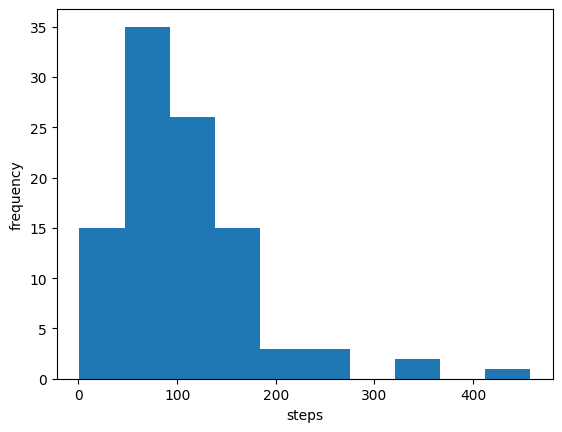

In [ ]:
np.random.seed(1234)

N = 100 # simulation runs

steps = [ simulation_environment(simple_reflex_agent, verb = False) for _ in range(N) ]

print("steps for first 10 runs:", steps[0:10])
print("mean steps:", np.mean(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

This simple reflex agent is about four times as better than the simple random agent at performance.

## Task 3: Implement a model-based reflex agent [20 Points]

This model-based agent will, if a position has not been visited before, pick a direction to based off of its current understanding of the world and what is blocked near it. It will remove the capability to go a particular direction if that direction has an obstacle or a wall, and gradually increase its knowlege of what each position it has been to. In particular, it will know which directions can be traversed for each position that it visits, which can be maintained in a DFS or BFS structure.


In [ ]:
class Model_based_reflex_agent:
    def __init__(self):
        # these variables form the agent's state
        self.frontier = list()
        self.visited = list()
        self.pos = [0,0]

    def act(self, bumpers, dirty):
        nav = { "north": [-1,0], "east": [0,1], "south": [1,0], "west": [0,-1] }
        directions = ["north", "east", "south", "west"]

        # Add current position to list of where agent has visited
        current_pos = self.pos
        if(tuple(current_pos) not in self.visited ):
          self.visited.append(tuple(current_pos))
          #print(f"Added new position: ", tuple(current_pos))
          # if dirty, clean it
          if(dirty):
              #note that the current tile is dirty
              return "suck"

        #print("Agent state:")
        #print(f"  pos: {self.pos}")
        #print(f"  visited: {self.visited}")

        #Assess environment, find out which ways the bumper is not activated on
        available_directions = directions
        for k, v in bumpers.items():
            if v == True:
                available_directions.remove(k)

        for direction in available_directions:
            new_pos = tuple(np.add(current_pos, nav[direction]))
            if not bumpers[direction] and not new_pos in self.visited:
                self.frontier.append(new_pos)

        goto_pos = self.frontier[-1]
        self.pos = goto_pos

        #print(f"  I want to go to: {goto_pos}")

        if goto_pos[0] < current_pos[0]: return("north")
        if goto_pos[0] > current_pos[0]: return("south")
        if goto_pos[1] > current_pos[1]: return("east")
        if goto_pos[1] < current_pos[1]: return("west")


In [ ]:
my_model_based_reflex_agent = Model_based_reflex_agent()
simulation_environment(my_model_based_reflex_agent.act, maxsteps = 5)

room with 5 dirty squares:
[[ True False False False False]
 [False False False  True False]
 [False False  True False False]
 [False False False  True False]
 [False  True False False False]]

start simulation
-------------------------------------------------- 

step: 1
current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 5
-------------------------------------------------- 

step: 2
current position: [2, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 5
-------------------------------------------------- 

step: 3
current position: [3, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 5
-------------------------------------------------- 

step: 4
current position: [4, 0]
percepts: bumpers={'north': Fal

5

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
def sim_runs(n, agent, N = 100):
    return [ simulation_environment(agent, n = n, verb = False) for _ in range(N) ]

In [ ]:
np.random.seed(1234)

runs = sim_runs(5,  simple_reflex_agent)
np.mean(runs)

110.13

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 412.26 | 102.24 | 9800.21|
| 10x10   | 2833.85 | 945.62 | 10000.0|
| 100x100 | 10000.0| 10000.0 | 10000.0|

Add charts to compare the performance of the different agents.

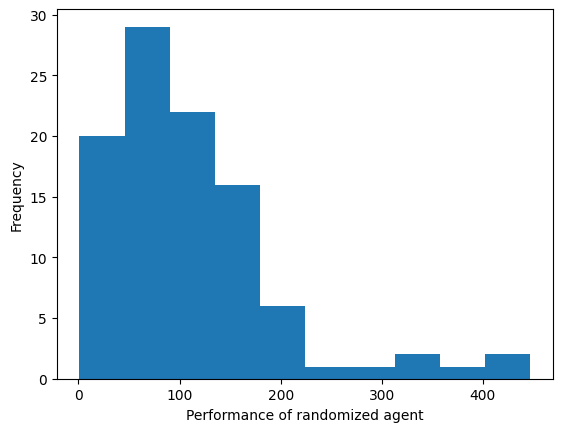

In [ ]:
import matplotlib.pyplot as plt

plt.hist(runs)
plt.xlabel("Performance of randomized agent")
plt.ylabel("Frequency")
plt.show()

The randomized agent was fairly inefficient when compared to the simple reflex agent, as most of its runs were able to be completed in a timeframe that was nearly four times faster when ran on the same 5x5 grid. As the room size increases, so does its ability to outshine the simple random agent in performance.

The model-based reflex agent's complexity affected its ability to perform more efficiently than the other two agents.

In [ ]:
np.random.seed(1234)

ns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
steps = np.repeat(0, len(ns))
for i in range(len(ns)):
    steps[i] = np.mean(sim_runs(ns[i], simple_reflex_agent))

steps

array([   2,   17,   49,  115,  209,  317,  461,  695, 1022, 1282, 1572,
       1810, 2251, 2778])

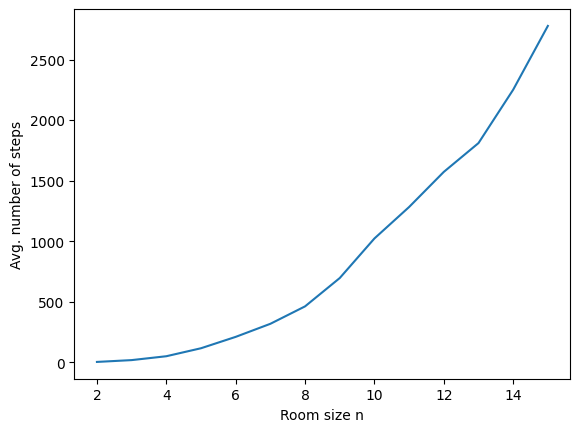

In [ ]:
plt.plot(ns, steps)
plt.xlabel("Room size n")
plt.ylabel("Avg. number of steps")
plt.show()

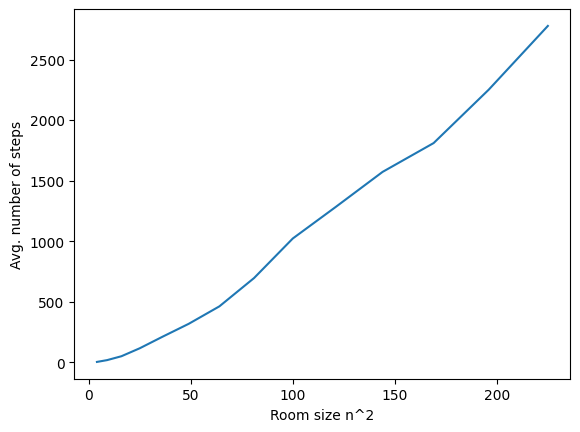

In [ ]:
ns2 = np.square(ns)

plt.plot(ns2, steps)
plt.xlabel("Room size n^2")
plt.ylabel("Avg. number of steps")
plt.show()

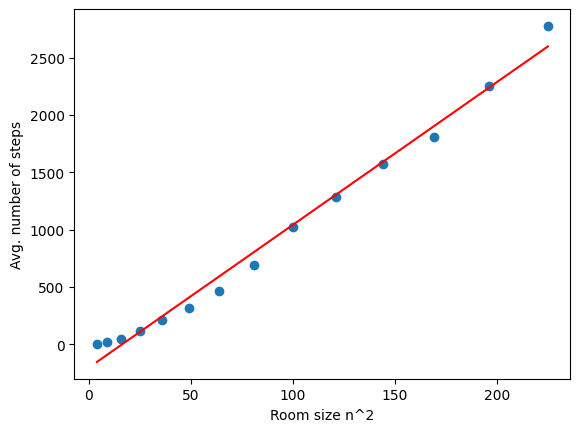

In [ ]:
plt.scatter(ns2, steps)
plt.xlabel("Room size n^2")
plt.ylabel("Avg. number of steps")

from scipy import stats

#regression
slope, intercept, r_value, p_value, std_err = stats.linregress(ns2,steps)

line = slope*ns2+intercept
plt.plot(ns2, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

The model-based reflex agent, if put into a rectangular room of an unknown size, shape, or with obstacles, will continuously travel around the room and choose a direction that is not currently blocked based off of the percepts of the current position. If the position it is currently at is dirty it will clean it.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

In [ ]:
import numpy as np

def simulation_environment_modified(agent, n = 5, p = .2, maxsteps = 10000, verb = True):

    #initialize room
    room = np.random.choice(a=[True, False], size=(5, 7), p=[p, 1-p])
    to_clean = np.sum(room)
    if verb:
        print(f"room with {to_clean} dirty squares:\n{room}")

    # initialize position to be a random position somewhere in the room
    x = np.random.randint(n)
    y = np.random.randint(n)
    pos = [x , y]

    if verb:
        print("\nstart simulation")
    for step in range(1, maxsteps+1):

        # prepare percepts
        bumpers = {
            "north": pos[0] == 0,
            "south": pos[0] == n-1,
            "west" : pos[1] == 0,
            "east" : pos[1] == n-1
                  }
        dirty = room[pos[0], pos[1]]

        if verb:
            print('-' * 50, "\n")
            print(f"step: {step}")
            #show_room(room, pos)
            print(f"current position: {pos}")
            print(f"percepts: bumpers={bumpers}, dirty={dirty}")

        # call agent program
        action = agent(bumpers, dirty)
        if verb:
            print("agent's action: ", action)

        # apply action to the environment
        if action == "north" and pos[0]>0:     pos[0] = pos[0]-1
        if action == "south" and pos[0]<(n-1): pos[0] = pos[0]+1
        if action == "west"  and pos[1]>0:     pos[1] = pos[1]-1
        if action == "east"  and pos[1]<(n-1): pos[1] = pos[1]+1
        if action == "suck":                   room[pos[0], pos[1]] = False

        # check for goal state and return performance measure
        to_clean = np.sum(room)
        if verb:
            print(f"dirty squares left: {to_clean}")

        if to_clean < 1:
            break

    # number of steps is the performance measure (step starts at 0 not 1)
    return step

simulation_environment_modified(my_model_based_reflex_agent.act, maxsteps = 25)

room with 7 dirty squares:
[[ True False False False False False False]
 [False False False False False  True False]
 [False False False False  True False False]
 [False False  True False  True False False]
 [False False False False False  True  True]]

start simulation
-------------------------------------------------- 

step: 1
current position: [3, 4]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': True}, dirty=True
agent's action:  south
dirty squares left: 7
-------------------------------------------------- 

step: 2
current position: [4, 4]
percepts: bumpers={'north': False, 'south': True, 'west': False, 'east': True}, dirty=False
agent's action:  west
dirty squares left: 7
-------------------------------------------------- 

step: 3
current position: [4, 3]
percepts: bumpers={'north': False, 'south': True, 'west': False, 'east': False}, dirty=False
agent's action:  west
dirty squares left: 7
-------------------------------------------------- 

step: 4


25

In order to perform better with obstacles, it would have to maintain a Depth First Search or Breadth First Search to find the nearest vertex that is dirty, and then clean that, instead of just cleaning when the current position it is at is dirty. It should be able to more efficiently backtrack to the particular dirty location using those algorithms, rather than make a decision based off of its current percepts and whether or not that location has been visited before.

In [13]:
# Answer goes here

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [14]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [15]:
# Your ideas/code